In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

FILE_NAME= "spam_or_not_spam.csv"

# Read Data

In [132]:
data = pd.read_csv(FILE_NAME)

In [167]:
data.head()

,email,label
1139,in article eNUMBERtsNUMBERt NUMBERzd NUMBER rd...,0
1649,dunno about the other tools but spamassassin ...,0
1222,on wed NUMBER oct NUMBER NUMBER NUMBER NUMBER ...,0
2731,behind every elite producer is an elite semin...,1
2475,geege wrote a strange story i know a guy who i...,0


# Data Augmentation

In [134]:
# data augmentation
from sklearn.utils import shuffle

data = shuffle(data)
data.head()

,email,label
1139,in article eNUMBERtsNUMBERt NUMBERzd NUMBER rd...,0
1649,dunno about the other tools but spamassassin ...,0
1222,on wed NUMBER oct NUMBER NUMBER NUMBER NUMBER ...,0
2731,behind every elite producer is an elite semin...,1
2475,geege wrote a strange story i know a guy who i...,0


# Data Structure

labels count : 2 - "1" or "0"


In [135]:
data['label'].value_counts()

0    2500
1     500
Name: label, dtype: int64

Total Number Texts

In [136]:
texts = []
for index, row in data.iterrows():
  texts.append(str(row.email))

len(texts), texts[0] #sample text

(3000,
 'in article eNUMBERtsNUMBERt NUMBERzd NUMBER rdsNUMBER you write patrick salsbury writes patrick one of the features i really like about exmh is the patrick ability to see which folders have unseen messages in patrick them but recently it seems to have vanished into the patrick bowels of my window manager in a place i can t get patrick to it claims to be running but doesn t appear patrick anywhere onscreen i m using enlightenment with a NUMBERxNUMBER patrick virtual desktop i ve tried dropping it to only NUMBER patrick screen no help patrick this may not help work but i ve discovered recently that alt middle mouse pops up a list of all of my windows if i leave my mouse on the background it lists alt middle mouse as display task list menu hth bill when i do that it just moves my mouse to the very edge of a window probably trying to center it on the off screen window in question i ll have to try it with another window manager and see if i can get exmh to put it back inside of san

In [137]:
import tensorflow as tf
print(tf.__version__)


2.13.0


In [138]:
labels = data['label']
len(labels)

3000

## Labels and Texts are obtained

In [139]:
import tensorflow as tf

tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=1000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [140]:
texts[0],sequences[0]


('in article eNUMBERtsNUMBERt NUMBERzd NUMBER rdsNUMBER you write patrick salsbury writes patrick one of the features i really like about exmh is the patrick ability to see which folders have unseen messages in patrick them but recently it seems to have vanished into the patrick bowels of my window manager in a place i can t get patrick to it claims to be running but doesn t appear patrick anywhere onscreen i m using enlightenment with a NUMBERxNUMBER patrick virtual desktop i ve tried dropping it to only NUMBER patrick screen no help patrick this may not help work but i ve discovered recently that alt middle mouse pops up a list of all of my windows if i leave my mouse on the background it lists alt middle mouse as display task list menu hth bill when i do that it just moves my mouse to the very edge of a window probably trying to center it on the off screen window in question i ll have to try it with another window manager and see if i can get exmh to put it back inside of sane bound

In [141]:
import keras
from keras import layers

max_vocab_length = 1000 # max number of words to have in our vocabulary
max_length = 20 # max length our sequences will be (e.g. how many words from a Tweet does our model see?)

text_vectorizer = tf.keras.layers.TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

text_vectorizer.adapt(texts)
sample_sentence = "bill stoddard wrote no one likes commercial spam and no one like unsolicited political spam end of story bill URL except perhaps for the people in charge owen URL political spam on your cell phone by lisa m bowman mailto lisa bowman cnet com special to zdnet news august NUMBER NUMBER NUMBER NUMBER pm pt url URL URL in a decision that treats text messaging on mobile phones essentially the same as bumper stickers the federal election commission has declared that senders of text based political ads don t have to disclose who funded them in an advisory opinion issued thursday the fec also suggested such messages include either a phone number or web site link so people could easily learn who paid for the message however the additional information won t be required the opinion could encourage the adoption of text based political ads as campaign experts look for new technological ways to sway voters at the same time opponents of the plan fear it could lead to anonymous political spam target wireless a small new jersey based wireless media company had asked the fec for an opinion on the matter saying that requiring financial disclosures on short messaging service sms mailings would use up too much of the NUMBER character maximum political messages on bumper stickers and buttons are also exempt from the financial disclosure requirement target wireless petition was supported by the national republican senatorial committee the cellular telecommunications and internet association and some advertising trade groups fec spokesman bob biersack said the opinion was in keeping with the commission s policy not to meddle with new technology that has the potential to reach more voters we have tried very hard not to get in the way particularly before everyone understands how the technology is going to work he said opponents of the plan have worried the exemption might encourage spam or allow senders to blast people with mass amounts of negative political messages while remaining anonymous biersack said the fec can revisit the issue if those problems surface target wireless president craig krueger characterized the opinion as good for america it will allow people to receive more communication from those running for office he said we have free speech on our side"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 20), dtype=int64, numpy=
array([[615,   1,  83,  50,  44,   1,   1, 120,   5,  50,  44,  63,   1,
        430, 120, 243,   6, 484, 615,  10]])>

# Training and Testing Data

In [142]:
# x: encoded sentences
# y : lables (1, 0)

# 90% for training
# 10% for testing


from sklearn.model_selection import train_test_split

# Transform the texts using the text vectorizer
encoded_texts = text_vectorizer(texts).numpy()

# Split the data into training and testing sets using train_test_split
texts_train, texts_test, labels_train, labels_test = train_test_split(encoded_texts, labels, test_size=0.2, random_state=42)

In [143]:
len(texts_train), len(labels_train), len(texts_test), len(labels_test)


(2400, 2400, 600, 600)

In [144]:
MAX_LEN = 20

In [145]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.layers import Embedding,SimpleRNN


model = Sequential()
model.add(Embedding(10000, 8, input_length=MAX_LEN))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(texts_train, labels_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_18 (Embedding)    (None, 20, 8)             80000     
                                                                 
 simple_rnn_12 (SimpleRNN)   (None, 32)                1312      
                                                                 
 dense_18 (Dense)            (None, 1)                 33        
                                                                 
Total params: 81345 (317.75 KB)
Trainable params: 81345 (317.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
60/60 [==============================] - 15s 204ms/step - loss: 0.3915 - acc: 0.8505 - val_loss: 0.3111 - val_acc: 0.8542
Epoch 2/10
60/60 [==============================] - 5s 84ms/step - loss: 0.2200 - acc: 0.9135 - val_loss: 0.2002 - val_acc: 0.9271
Epoch 3/10
60/6

In [146]:
model.save("model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [147]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [148]:
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


# Represent Loss

In [149]:
def graph_history(history):
  #['loss', 'acc', 'val_loss', 'val_acc']
  plt.plot(history.history['loss'], label = "loss")
  plt.plot(history.history['val_loss'], label = "val_loss")
  plt.legend()

  plt.figure()

  plt.plot(history.history['acc'], label = "accuracy")
  plt.plot(history.history['val_acc'], label = "val_accuracy")
  plt.legend()


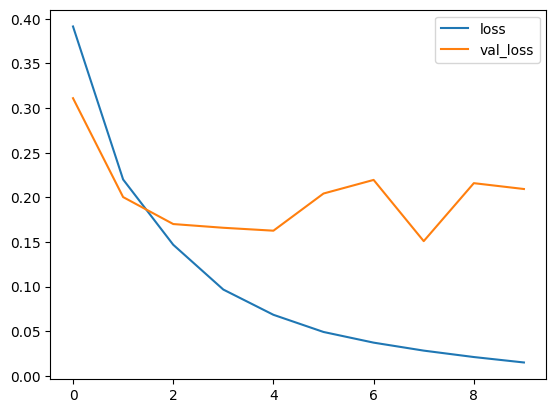

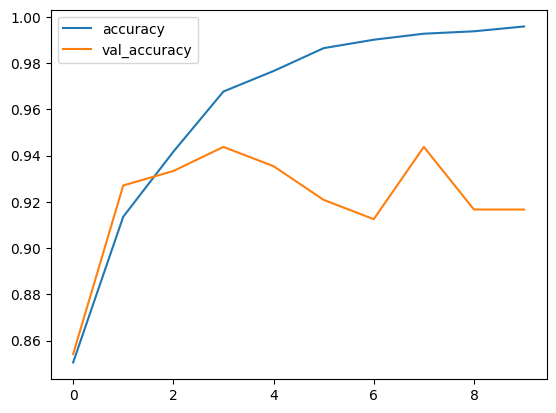

In [150]:
graph_history(history)

In [151]:
result=model.evaluate(texts_test, labels_test)
print("test loss:{}\ntest accuracy:{}".format(result[0],result[1]))

19/19 [==============================] - 0s 5ms/step - loss: 0.1804 - acc: 0.9383
test loss:0.18043933808803558
test accuracy:0.9383333325386047


In [152]:
def preprocess_email_old(email_text):
    sequences = tokenizer.texts_to_sequences([email_text])
    padded_sequence = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=MAX_LEN, padding='post', truncating='post')
    print(padded_sequence[0])
    return padded_sequence[0]


In [153]:
def is_email_scam_old(email_text):

    numerical_sequence = preprocess_email(email_text)
    padded_sequence = tf.keras.preprocessing.sequence.pad_sequences([numerical_sequence], maxlen=MAX_LEN)
    prediction = model.predict(padded_sequence)
    print(prediction)
    is_scam = prediction[0][0] >= 0.5
    return is_scam

In [154]:
email = "martin adamson wrote isn t it just basically a mixture of beaten egg and bacon or pancetta really you mix in the raw egg to the cooked pasta and the heat of the pasta cooks the egg that s my understanding you re probably right mine s just the same but with the cream added to the eggs i guess i should try it without actually looking on the internet for a recipe i found this one from possibly one of the scariest people i ve ever seen and he s a us congressman URL that s one of the worst non smiles ever stew ps apologies if any of the list s maine residents voted for this man you won t do it again once you ve seen this pic stewart smith scottish microelectronics centre university of edinburgh URL yahoo groups sponsor NUMBER dvds free s p join now URL to unsubscribe from this group send an email to forteana unsubscribe URL your use of yahoo groups is subject to URL "

In [155]:
result = is_email_scam_old(email)



[ 82 394  25  13  50   6   5   4  26 177  12   7   2   3   2   4   2   5
   2   2]
1/1 [==============================] - 0s 137ms/step
[[0.0070643]]


In [156]:
# label=list(data['label'])
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
x_train=sequences[:2000]
y_train=labels[:2000]
x_test=sequences[2000:]
y_test=labels[2000:]



In [157]:
MAX_LEN = 20
from keras import preprocessing

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=MAX_LEN)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=MAX_LEN)


In [158]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.layers import Embedding,LSTM


model_1 = Sequential()

model_1.add(Embedding(2000, 8, input_length=MAX_LEN))

model_1.add(LSTM(32))
model_1.add(Dense(1, activation='sigmoid'))
model_1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])


In [159]:
model_1.summary()


Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_19 (Embedding)    (None, 20, 8)             16000     
                                                                 
 lstm_6 (LSTM)               (None, 32)                5248      
                                                                 
 dense_19 (Dense)            (None, 1)                 33        
                                                                 
Total params: 21281 (83.13 KB)
Trainable params: 21281 (83.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [160]:
history_1 = model_1.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/10
50/50 [==============================] - 8s 99ms/step - loss: 0.5011 - acc: 0.8250 - val_loss: 0.4166 - val_acc: 0.8250
Epoch 2/10
50/50 [==============================] - 2s 31ms/step - loss: 0.3028 - acc: 0.8637 - val_loss: 0.2699 - val_acc: 0.8875
Epoch 3/10
50/50 [==============================] - 1s 24ms/step - loss: 0.1644 - acc: 0.9431 - val_loss: 0.2481 - val_acc: 0.9225
Epoch 4/10
50/50 [==============================] - 1s 20ms/step - loss: 0.1158 - acc: 0.9650 - val_loss: 0.1603 - val_acc: 0.9375
Epoch 5/10
50/50 [==============================] - 1s 13ms/step - loss: 0.0855 - acc: 0.9737 - val_loss: 0.1541 - val_acc: 0.9475
Epoch 6/10
50/50 [==============================] - 0s 6ms/step - loss: 0.0689 - acc: 0.9794 - val_loss: 0.1330 - val_acc: 0.9450
Epoch 7/10
50/50 [==============================] - 0s 6ms/step - loss: 0.0540 - acc: 0.9837 - val_loss: 0.1089 - val_acc: 0.9600
Epoch 8/10
50/50 [==============================] - 0s 10ms/step - loss: 0.0480 - acc

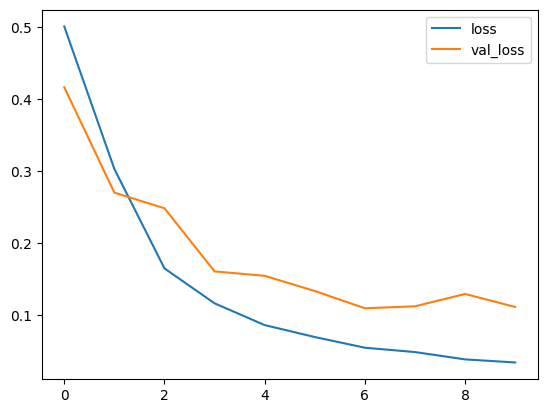

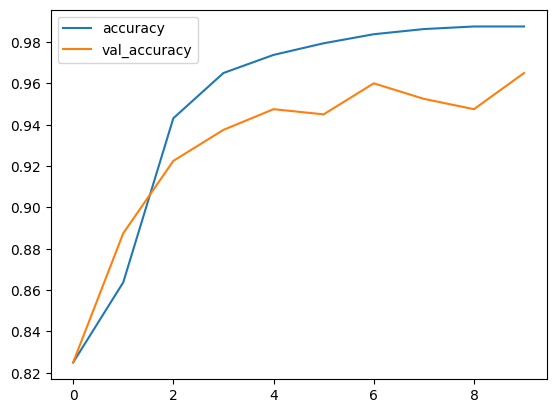

In [161]:
graph_history(history_1)

In [162]:
def preprocess_email(email_text):
    sequences = tokenizer.texts_to_sequences([email_text])
    padded_sequence = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=MAX_LEN, padding='post', truncating='post')
    print(padded_sequence[0])
    return padded_sequence[0]


In [163]:
def is_email_scam(email_text):
    numerical_sequence = preprocess_email(email_text)

    padded_sequence = tf.keras.preprocessing.sequence.pad_sequences([numerical_sequence], maxlen=MAX_LEN)
    prediction = model_1.predict(padded_sequence)

    is_scam = prediction[0][0] >= 0.5
    if is_scam:
      return "is scam: ", prediction
    else:
      return "is not scam: ", prediction

In [164]:
email_scam = "Offer only valid for new customers with qualifying auto-renewing subscription purchase. '18 Free Meals + 3 Surprise Gifts + Free Shipping on First Box' offer is based on a total discount applied over a 9-week period for a 2-person, 4-recipe subscription. Shipping fee applies on all deliveries after the first box. Discount may vary for other meal plans and sizes. '3 surprise gift' offer available after the purchase of your 4th, 6th and 8th boxes (total approx. value of 3 surprise gifts while supplies last). Not valid on premiums, meal upgrades, add-ons, taxes or shipping fees. May not be combined with gift cards or any other promotion. No cash value. Void outside the U.S. and where prohibited. Offer cannot be sold or otherwise bartered. HelloFresh has the right to end or modify any offer at any time. Additional restrictions may apply. See terms and conditions for more details. You are receiving this email from a third party marketing partner to HelloFresh, not from HelloFresh directly. If you'd prefer not to receive advertisements from Hellofresh Affiliate Partners, you can unsubscribe here or write to: Hellofresh Affiliate Department - 28 Liberty Street, New York, NY"

is_email_scam(email_scam)

[347  61  14  63 817  18 406 986  67  67 980  16 108 347  10 252  16   6
 401 100]
1/1 [==============================] - 0s 342ms/step


('is scam: ', array([[0.9520835]], dtype=float32))

In [165]:
email_notScam = "I'm reaching out regarding the new job posting"
is_email_scam(email_notScam)

[ 51   2  63 544   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0]
1/1 [==============================] - 0s 19ms/step


('is scam: ', array([[0.67380285]], dtype=float32))

In [166]:
# saving model and later convert to tfjs
model_1.save("scam_detector_model.h5")